<a href="https://colab.research.google.com/github/alevant/mlcourse-Nov22/blob/main/Classification_and_K_means_fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing K-Means clustering on Fish Market dataset with K = 7 (No. of fish species). Normalize dataset before clustering. Scikit Learn is used for clustering. Collecting the best possible  combination and assignment in clusters and performance comparison with the true class labels (Species)? Describing results.



Import packages



In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
%matplotlib inline

Drop "Species" to perform unsupervised clustering 

In [114]:
df = pd.read_csv('fish.csv')
df_species = df.Species
df.drop(labels='Species', axis = 1, inplace=True)
df.dropna()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


Scale the variable and perform clusterng

In [115]:
# from sklearn import preprocessing

# normalized_df = preprocessing.normalize(df)
# print(normalized_df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns[:6])
df_scaled
# df_preprocessed = pd.concat([df_scaled,dummies,target],axis=1)


,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


In [116]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
df_species=df_species.map({'Parkki':0,'Perch':1,'Pike':2, 'Roach':3,'Smelt':4,'Whitefish':5, 'Bream':6})
kmeans = KMeans(7,init='k-means++')
kmeans.fit(df_scaled)
#kmeans.labels_
kmeans.predict(df_scaled)

C:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 5, 5, 5, 5, 5,
       5, 5, 5, 0, 0, 0, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

Now "remeber" that you actually know the real labels of each fish check your clustering performance.
Since clustering just give arbitrary labels to each cluster you need to find out what which cluster corresponds to  which Spices.

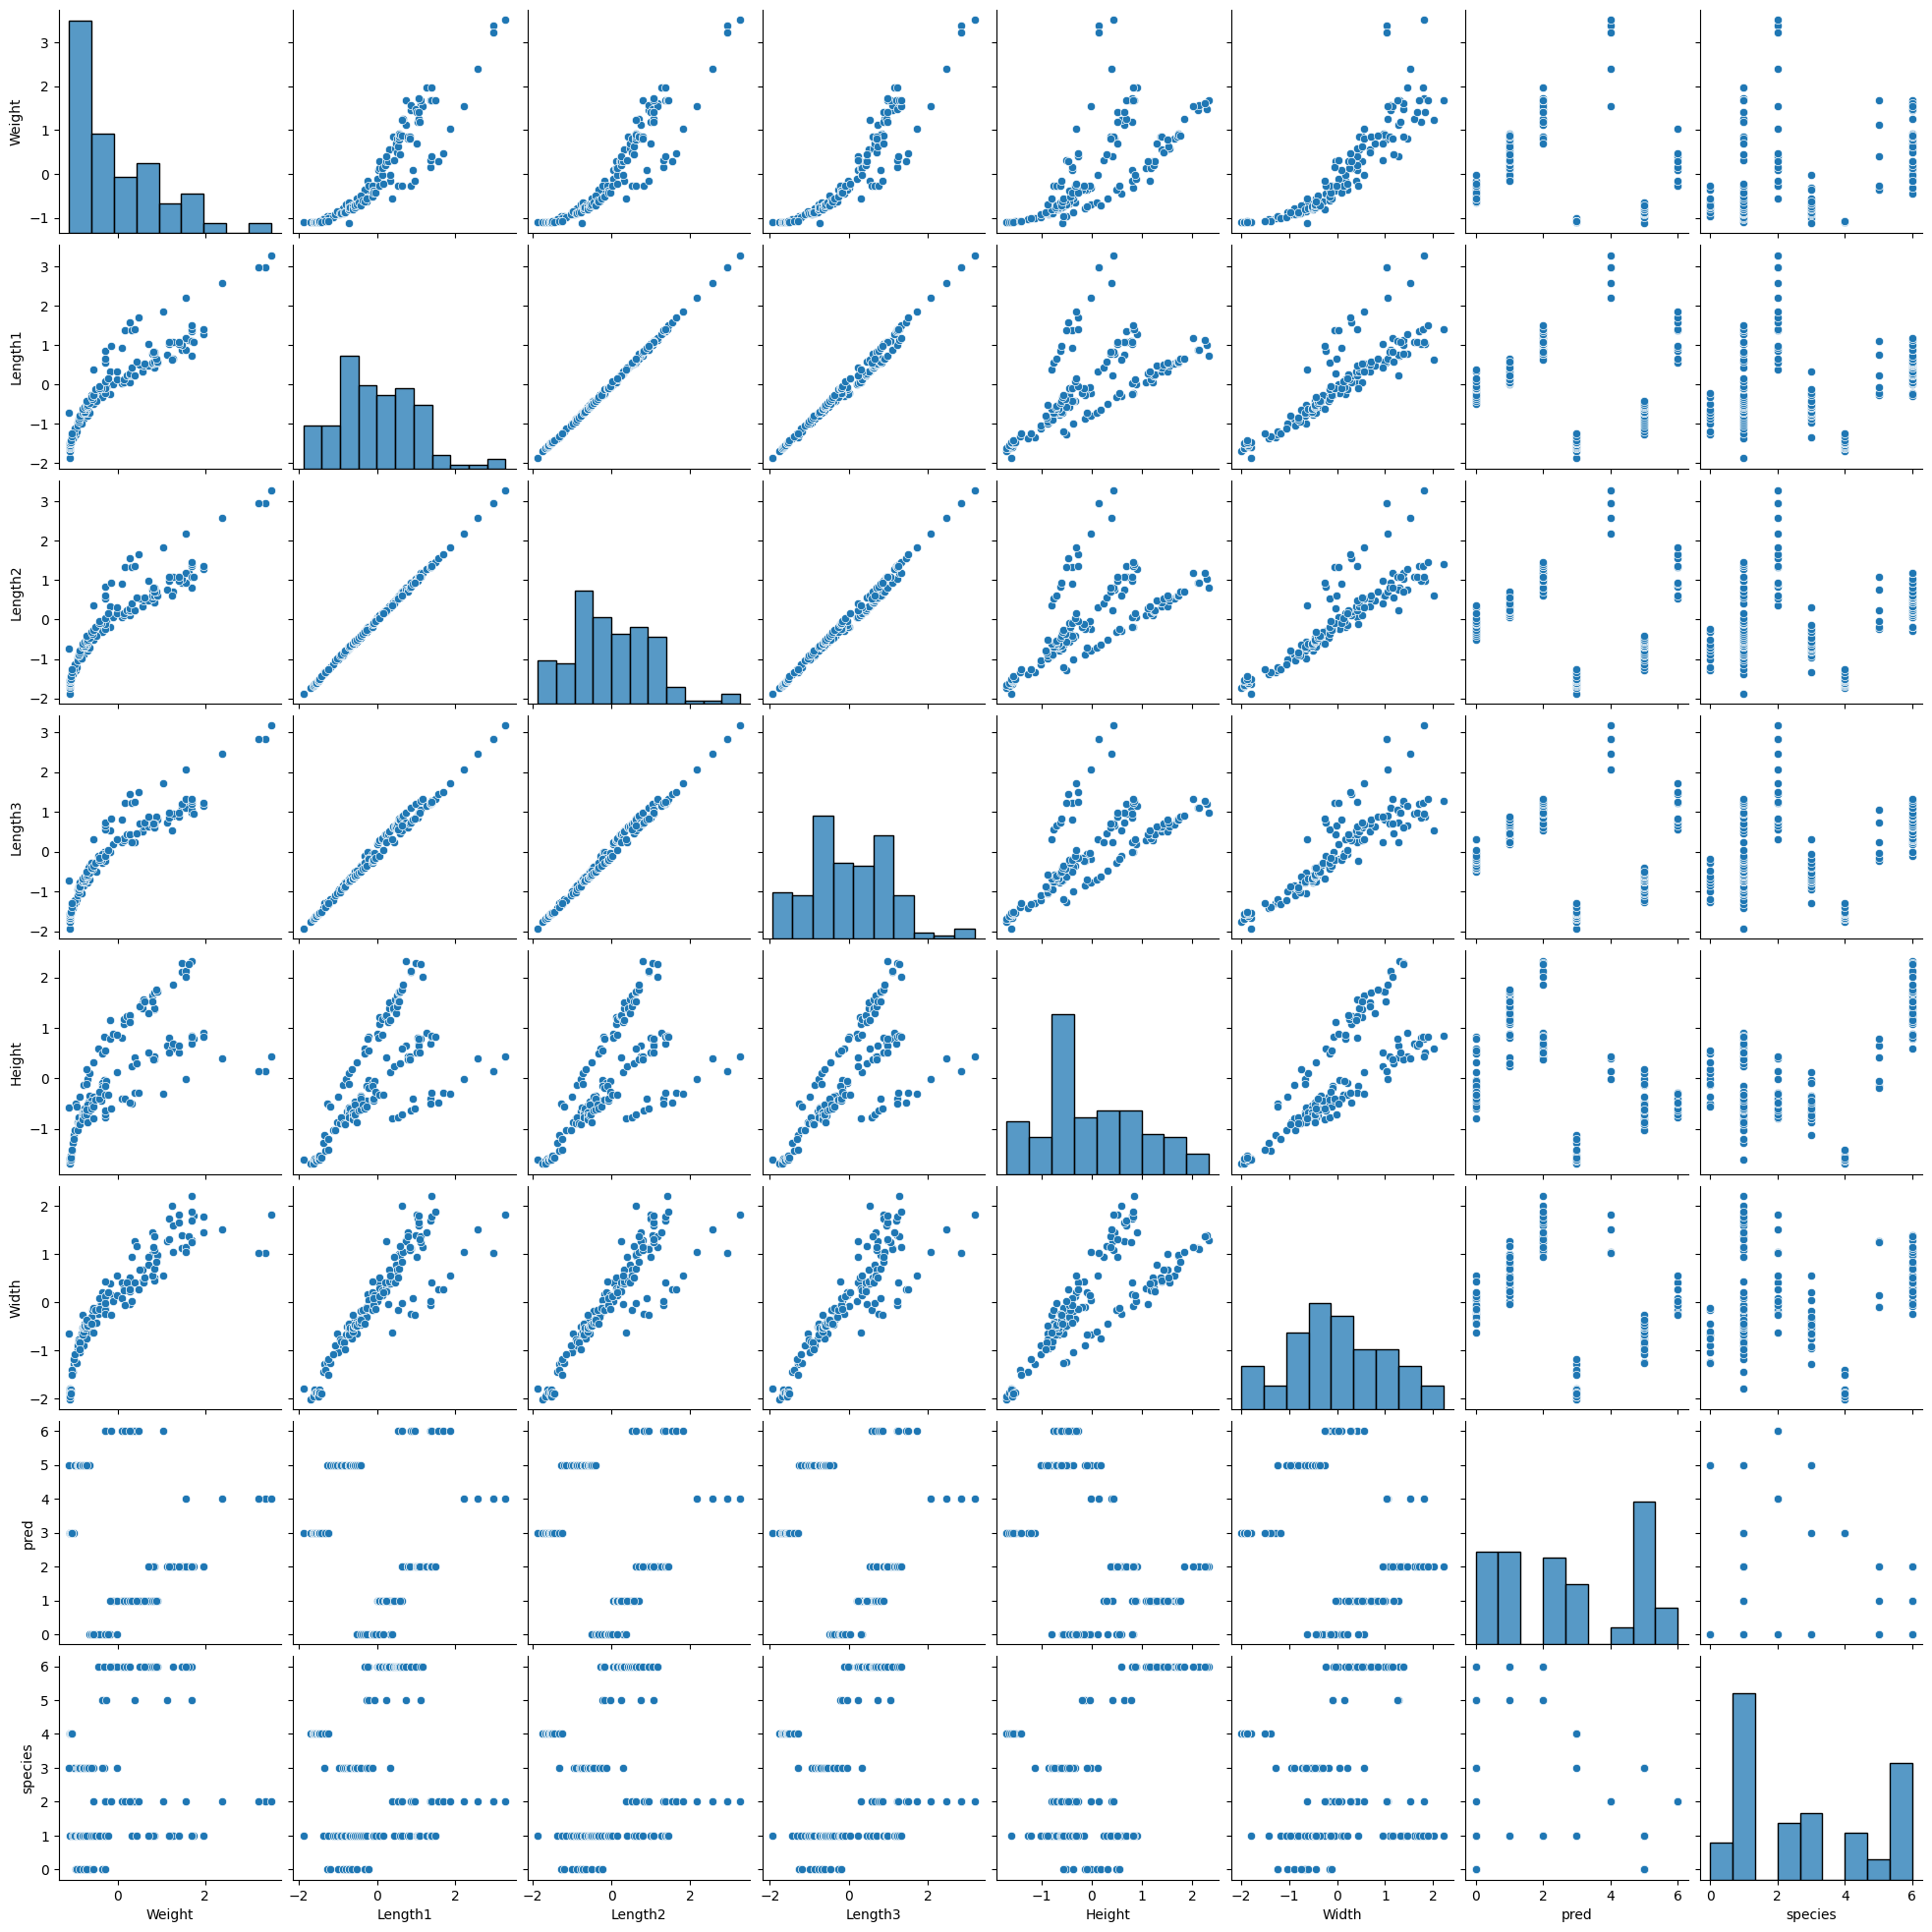

In [117]:
df_scaled['pred']= kmeans.labels_
df_scaled['species'] = df_species
df_species
sns.pairplot(df_scaled)

Calculate accuray of your clustering

In [118]:
print(accuracy_score(df_species,kmeans.labels_))

0.03773584905660377


Calcuate and show confusion matrix using heatmap function from seaborn

<Axes: >

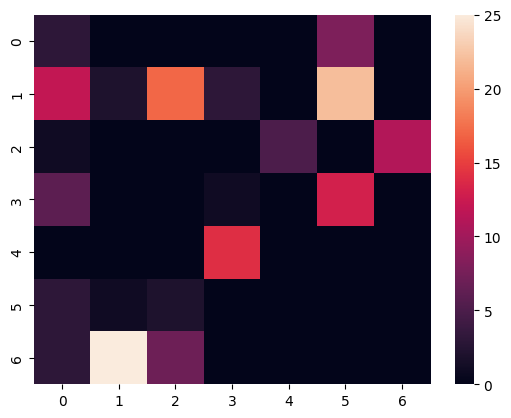

In [119]:
sns.heatmap(confusion_matrix(df_species,kmeans.labels_))


Explain the results

